### **Intorduction**
Cleaning scraped data is a crucial step in the data preprocessing pipeline to ensure its quality and reliability for analysis or further use. To clean data, we'll do:
1. Missing Values: Data may have missing values that need to be handled appropriately.
2. Inconsistent Formatting: Data may have inconsistencies in formatting, such as different date formats, capitalization variations, etc.
3. Noise and Outliers: Sometimes, scraped data contains noise or outliers that need to be identified and either corrected or removed.
4. Duplicate Entries: There might be duplicate entries in the data that need to be detected and removed.
5. Text Cleanup: Textual data may contain special characters, HTML tags, or irrelevant symbols that need to be removed.
6. Data Type Conversion: Ensure that data types are appropriate for analysis by converting them if necessary.

In [2]:
#load data
import pandas as pd
df = pd.read_csv('tokopedia_fix.csv')
df.head()

,Unnamed: 0,Nama Barang,Harga,Terjual,Rating,Lokasi,Label
0,0,Indomie Satuan/Lusinan/Karton,Rp2.900,Terjual 8 rb+,4.9,Jakarta Selatan,yes
1,1,indomie goreng 5 pc - goreng rica,Rp15.800,Terjual 100+,5.0,Kab. Bekasi,yes
2,2,Indomie Goreng 1 Dus Isi 40 pcs 85G,Rp115.000,Terjual 500+,5.0,Tangerang Selatan,yes
3,3,INDOMIE GORENG INSTAN 85 GRAM,Rp2.900,Terjual 10 rb+,4.8,Jakarta Barat,yes
4,4,INDOMIE GORENG - ALL VARIANT - PCS/DOZEN/CARTON,Rp3.100,Terjual 3 rb+,4.9,Jakarta Selatan,yes


In [3]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7234 non-null   int64  
 1   Nama Barang  7234 non-null   object 
 2   Harga        7234 non-null   object 
 3   Terjual      5793 non-null   object 
 4   Rating       5511 non-null   float64
 5   Lokasi       7211 non-null   object 
 6   Label        7234 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 395.7+ KB


In [4]:
#delete first column
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Nama Barang,Harga,Terjual,Rating,Lokasi,Label
0,Indomie Satuan/Lusinan/Karton,Rp2.900,Terjual 8 rb+,4.9,Jakarta Selatan,yes
1,indomie goreng 5 pc - goreng rica,Rp15.800,Terjual 100+,5.0,Kab. Bekasi,yes
2,Indomie Goreng 1 Dus Isi 40 pcs 85G,Rp115.000,Terjual 500+,5.0,Tangerang Selatan,yes
3,INDOMIE GORENG INSTAN 85 GRAM,Rp2.900,Terjual 10 rb+,4.8,Jakarta Barat,yes
4,INDOMIE GORENG - ALL VARIANT - PCS/DOZEN/CARTON,Rp3.100,Terjual 3 rb+,4.9,Jakarta Selatan,yes


In [5]:
#cek jumlah
print(df.count())
print('--------------------')

#cek null value
print(df.isnull().sum())

Nama Barang    7234
Harga          7234
Terjual        5793
Rating         5511
Lokasi         7211
Label          7234
dtype: int64
--------------------
Nama Barang       0
Harga             0
Terjual        1441
Rating         1723
Lokasi           23
Label             0
dtype: int64


In [6]:
#cek jumlah data duplikat
df.duplicated().sum()

525

In [7]:
#hapus data duplikat
df = df.drop_duplicates()
print(len(df))

6709


In [9]:
df.head()

,Nama Barang,Harga,Terjual,Rating,Lokasi,Label
0,Indomie Satuan/Lusinan/Karton,Rp2.900,Terjual 8 rb+,4.9,Jakarta Selatan,yes
1,indomie goreng 5 pc - goreng rica,Rp15.800,Terjual 100+,5.0,Kab. Bekasi,yes
2,Indomie Goreng 1 Dus Isi 40 pcs 85G,Rp115.000,Terjual 500+,5.0,Tangerang Selatan,yes
3,INDOMIE GORENG INSTAN 85 GRAM,Rp2.900,Terjual 10 rb+,4.8,Jakarta Barat,yes
4,INDOMIE GORENG - ALL VARIANT - PCS/DOZEN/CARTON,Rp3.100,Terjual 3 rb+,4.9,Jakarta Selatan,yes


In [8]:
df.isnull().sum()

Nama Barang       0
Harga             0
Terjual        1406
Rating         1671
Lokasi           22
Label             0
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

Nama Barang    0
Harga          0
Terjual        0
Rating         0
Lokasi         0
Label          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5016 entries, 0 to 7233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama Barang  5016 non-null   object 
 1   Harga        5016 non-null   object 
 2   Terjual      5016 non-null   object 
 3   Rating       5016 non-null   float64
 4   Lokasi       5016 non-null   object 
 5   Label        5016 non-null   object 
dtypes: float64(1), object(5)
memory usage: 274.3+ KB


In [ ]:
# df[["Nama Barang", "Harga", "Terjual", "Lokasi"]] = df[["Nama Barang", "Harga", "Terjual", "Lokasi"]].apply(lambda x: x.str.lower())
# df.head()

In [11]:
#mengubah pola data menggunakan regex
import re
df['Harga'] = df['Harga'].str.replace(r'^Rp|\.', '', regex=True)
df['Terjual'] = df['Terjual'].str.replace(r'\bTerjual\b', '', regex=True).str.replace(r'\+', '', regex=True).str.replace(r'rb', '000').str.replace(" ", "")
df.head()

,Nama Barang,Harga,Terjual,Rating,Lokasi,Label
0,Indomie Satuan/Lusinan/Karton,2900,8000,4.9,Jakarta Selatan,yes
1,indomie goreng 5 pc - goreng rica,15800,100,5.0,Kab. Bekasi,yes
2,Indomie Goreng 1 Dus Isi 40 pcs 85G,115000,500,5.0,Tangerang Selatan,yes
3,INDOMIE GORENG INSTAN 85 GRAM,2900,10000,4.8,Jakarta Barat,yes
4,INDOMIE GORENG - ALL VARIANT - PCS/DOZEN/CARTON,3100,3000,4.9,Jakarta Selatan,yes


In [13]:
#transform the feature
df[["Harga", "Terjual"]] = df[["Harga", "Terjual"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5016 entries, 0 to 7233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama Barang  5016 non-null   object 
 1   Harga        5016 non-null   int32  
 2   Terjual      5016 non-null   int32  
 3   Rating       5016 non-null   float64
 4   Lokasi       5016 non-null   object 
 5   Label        5016 non-null   object 
dtypes: float64(1), int32(2), object(3)
memory usage: 235.1+ KB


In [17]:
df.Lokasi.unique()

array(['Jakarta Selatan', 'Kab. Bekasi', 'Tangerang Selatan',
       'Jakarta Barat', 'Jakarta Timur', 'Dilayani Tokopedia',
       'Tangerang', 'Jakarta Utara', 'Jakarta Pusat', 'Bekasi', 'Malang',
       'Kab. Sidoarjo', 'Depok', 'Bogor', 'Bandung', 'Kab. Tangerang',
       'Makassar', 'Kab. Bogor', 'Semarang', 'Surabaya', 'Medan',
       'Denpasar', 'Kab. Bandung', 'Bandar Lampung', 'Palembang',
       'Kab. Sleman', 'Cimahi', 'Tanjung Pinang', 'Pekanbaru', 'Batam',
       'Kab. Pekalongan', 'Kab. Garut', 'Binjai', 'Kab. Magelang',
       'Kab. Mojokerto', 'Yogyakarta', 'Pontianak', 'Kab. Malang',
       'Kab. Bandung Barat', 'Kab. Cirebon', 'Surakarta', 'Kab. Bantul',
       'Kab. Banyumas', 'Balikpapan', 'Serang', 'Kab. Tuban',
       'Kab. Gianyar', 'Kab. Cilacap', 'Tegal', 'Kab. Badung',
       'Pekalongan', 'Cirebon', 'Kab. Purbalingga', 'Salatiga',
       'Kab. Klaten', 'Kab. Sukoharjo'], dtype=object)

In [14]:
(df.Lokasi == "Dilayani Tokopedia").sum()

191

In [15]:
df.drop(df[df['Lokasi'] == 'Dilayani Tokopedia'].index, inplace=True)
df.head()

,Nama Barang,Harga,Terjual,Rating,Lokasi,Label
0,Indomie Satuan/Lusinan/Karton,2900,8000,4.9,Jakarta Selatan,yes
1,indomie goreng 5 pc - goreng rica,15800,100,5.0,Kab. Bekasi,yes
2,Indomie Goreng 1 Dus Isi 40 pcs 85G,115000,500,5.0,Tangerang Selatan,yes
3,INDOMIE GORENG INSTAN 85 GRAM,2900,10000,4.8,Jakarta Barat,yes
4,INDOMIE GORENG - ALL VARIANT - PCS/DOZEN/CARTON,3100,3000,4.9,Jakarta Selatan,yes


In [20]:
df.Lokasi.unique()

array(['Jakarta Selatan', 'Kab. Bekasi', 'Tangerang Selatan',
       'Jakarta Barat', 'Jakarta Timur', 'Tangerang', 'Jakarta Utara',
       'Jakarta Pusat', 'Bekasi', 'Malang', 'Kab. Sidoarjo', 'Depok',
       'Bogor', 'Bandung', 'Kab. Tangerang', 'Makassar', 'Kab. Bogor',
       'Semarang', 'Surabaya', 'Medan', 'Denpasar', 'Kab. Bandung',
       'Bandar Lampung', 'Palembang', 'Kab. Sleman', 'Cimahi',
       'Tanjung Pinang', 'Pekanbaru', 'Batam', 'Kab. Pekalongan',
       'Kab. Garut', 'Binjai', 'Kab. Magelang', 'Kab. Mojokerto',
       'Yogyakarta', 'Pontianak', 'Kab. Malang', 'Kab. Bandung Barat',
       'Kab. Cirebon', 'Surakarta', 'Kab. Bantul', 'Kab. Banyumas',
       'Balikpapan', 'Serang', 'Kab. Tuban', 'Kab. Gianyar',
       'Kab. Cilacap', 'Tegal', 'Kab. Badung', 'Pekalongan', 'Cirebon',
       'Kab. Purbalingga', 'Salatiga', 'Kab. Klaten', 'Kab. Sukoharjo'],
      dtype=object)

<Axes: ylabel='Harga'>

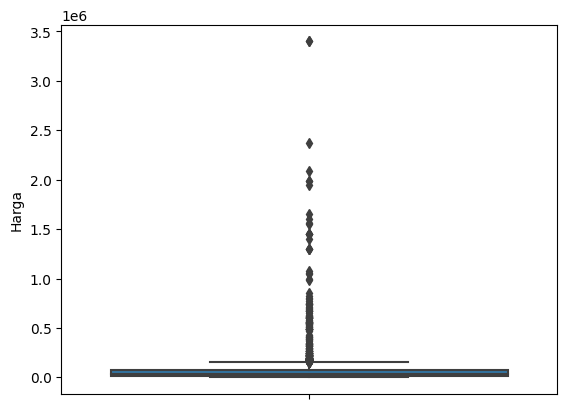

In [16]:
import seaborn as sns

sns.boxplot(y='Harga', data=df)

In [17]:
#iqr
lowerlimit = df['Harga'].quantile(0.05)
print(lowerlimit)
len(df[df['Harga'] < lowerlimit])

upperlimit = df['Harga'].quantile(0.95)
print(upperlimit)
len(df[df['Harga'] > upperlimit])

df = df[(df['Harga'] > lowerlimit) & (df['Harga'] < upperlimit)]
print(df)

4991.8
160000.0
                                            Nama Barang   Harga  Terjual   
1                     indomie goreng 5 pc - goreng rica   15800      100  \
2                   Indomie Goreng 1 Dus Isi 40 pcs 85G  115000      500   
7                        4+1 pcs Indomie Goreng Spesial   15000     1000   
9                             indomie goreng 1dus 40pcs  110000     1000   
10    Paket Bundling Indomie Mie Instant Rasa Soto P...   12200     7000   
...                                                 ...     ...      ...   
7229  Jay 's Bbq Sauce / Sauce Bbq / Saus barberkyu ...   55000      250   
7230  MAESTRO Salad Dressing Wijen Sangrai / Roasted...    5600      250   
7231  Ottogi Honey Mustard Sauce - Saus Mustard deng...   51000        6   
7232  MAESTRO Salad Dressing Blue Cheese / Saus Rasa...   20990       17   
7233        [ECERAN] Beef Galbi Sauce OTTOGI - net 840g   82000      250   

      Rating             Lokasi Label  
1        5.0        Kab. Bekasi

<Axes: ylabel='Harga'>

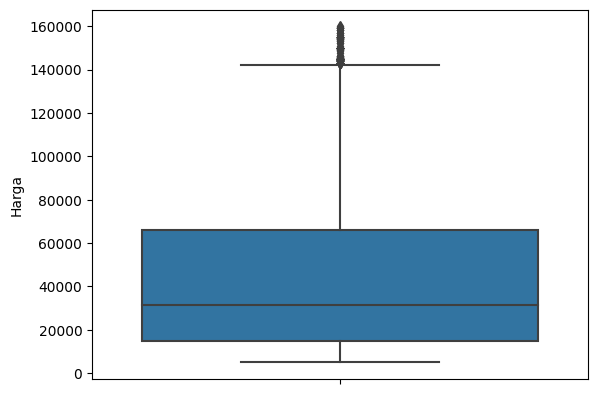

In [18]:
import seaborn as sns

sns.boxplot(y='Harga', data=df)

<Axes: ylabel='Terjual'>

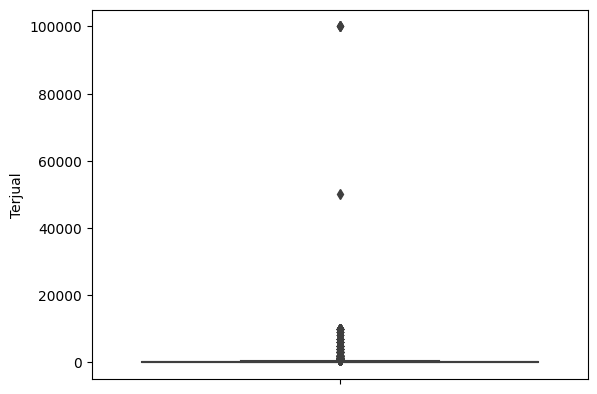

In [19]:
import seaborn as sns

sns.boxplot(y='Terjual', data=df)

In [20]:
#iqr
lowerlimit = df['Terjual'].quantile(0.05)
print(lowerlimit)
len(df[df['Terjual'] < lowerlimit])

upperlimit = df['Terjual'].quantile(0.95)
print(upperlimit)
len(df[df['Terjual'] > upperlimit])

df = df[(df['Terjual'] > lowerlimit) & (df['Terjual'] < upperlimit)]
print(df)

4.0
2000.0
                                            Nama Barang   Harga  Terjual   
1                     indomie goreng 5 pc - goreng rica   15800      100  \
2                   Indomie Goreng 1 Dus Isi 40 pcs 85G  115000      500   
7                        4+1 pcs Indomie Goreng Spesial   15000     1000   
9                             indomie goreng 1dus 40pcs  110000     1000   
16                             INDOMIE MIE GORENG 5 PCS   14500      500   
...                                                 ...     ...      ...   
7229  Jay 's Bbq Sauce / Sauce Bbq / Saus barberkyu ...   55000      250   
7230  MAESTRO Salad Dressing Wijen Sangrai / Roasted...    5600      250   
7231  Ottogi Honey Mustard Sauce - Saus Mustard deng...   51000        6   
7232  MAESTRO Salad Dressing Blue Cheese / Saus Rasa...   20990       17   
7233        [ECERAN] Beef Galbi Sauce OTTOGI - net 840g   82000      250   

      Rating             Lokasi Label  
1        5.0        Kab. Bekasi   ye

<Axes: ylabel='Terjual'>

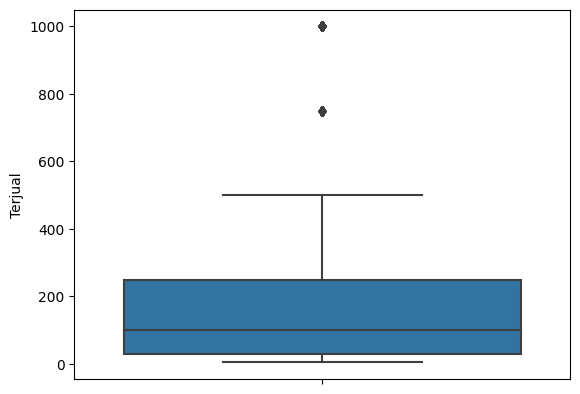

In [21]:
import seaborn as sns

sns.boxplot(y='Terjual', data=df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3759 entries, 1 to 7233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama Barang  3759 non-null   object 
 1   Harga        3759 non-null   int32  
 2   Terjual      3759 non-null   int32  
 3   Rating       3759 non-null   float64
 4   Lokasi       3759 non-null   object 
 5   Label        3759 non-null   object 
dtypes: float64(1), int32(2), object(3)
memory usage: 176.2+ KB


In [28]:
df.to_csv('clean3.csv', index=False)

In [ ]:
############################ end of pre 1